<a href="https://www.kaggle.com/code/edgarcovantesosuna/cyclistic-bike-share-analysis?scriptVersionId=171412678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Cyclistic bike-share analysis

by Edgar Covantes Osuna

## Content

This R markdown document contains a solution for the Google Data Analytics Capstone: Complete a Case Study, as part of the [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics).

The task titled "Case Study 1: How does a bike-share navigate speedy success?" consists of analyzing a case similar to what you might be asked for in a job interview.

In the following we will present a solution using the Python programming language and we will detailed the process followed to solve the case study.

## Scenario

The scenario is based on a fictional company called Cyclistic, a bike-share company in Chicago. The **hypothesis** is that the director believes the company's future success depends on maximizing the number of annual memberships.

To do this, it is necessary to understand how the different customers behave, for this we need to study how *casual riders* (customers who purchase single-ride or full-day passes) and *annual members* (customers who purchase annual memberships) use Cyclistic bikes differently.

The **goal** for the team is to design a new marketing strategy to convert casual riders into annual members. And to achieve such goal the team has defined the following research questions that will guide the analysis:

1.  How do annual members and casual riders use Cyclistic bikes differently?

2.  Why would casual riders buy Cyclistic annual memberships?

3.  How can Cyclistic use digital media to influence casual riders to become members?

In this case, we will focus on the first question, provide insights about the different habits of casual riders and annual members using Cyclistic bikes.

## Obtaining the data set

We have used Cyclistic's historical trip data to analyze and identify trends. For this we have make use of the information contained in the following ZIP files ([available here](https://divvy-tripdata.s3.amazonaws.com/index.html)):

| ZIP file names          | Date Modified              | Size     |
|:------------------------|:---------------------------|:---------|
| Divvy_Trips_2019_Q1.zip | Nov 8th 2021, 04:05:26 pm  | 9.57 MB  |
| Divvy_Trips_2019_Q2.zip | Nov 8th 2021, 04:06:12 pm  | 28.72 MB |
| Divvy_Trips_2019_Q3.zip | Jan 24th 2020, 10:08:06 am | 42.36 MB |
| Divvy_Trips_2019_Q4.zip | Jan 24th 2020, 10:08:07 am | 18.40 MB |
| Divvy_Trips_2020_Q1.zip | May 26th 2020, 07:17:43 pm | 15.92 MB |

The reason we have chosen those files is to have the newest information for the analysis, the complete 2019 information, plus the 2020 Q1.

## Loading libraries

Next we define a few libraries what we will need through the whole project.

In [1]:
# Collection of R libraries designed for data science
library(tidyverse)

# Package used to manage conflicts (manage ambiguity with packages)
library(conflicted)

# Package for declaratively creating graphics
library(ggplot2)

# Package used to provide cross-platform interface to file system operations
library(fs)

# Package for totally ordered indexed observations
library(zoo)

# Declaring filter and lag from the package dplyr as default choices
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


## Loading data-sets

Before we start working on the downloaded data-sets, let us first detailed how we have defined our work-space:

In [10]:
list.files(path = "../input/divvy-trips-2019-q1-q4-2020-q1")

[1] "Divvy_Trips_2019_Q1.csv" "Divvy_Trips_2019_Q2.csv"
[3] "Divvy_Trips_2019_Q3.csv" "Divvy_Trips_2019_Q4.csv"
[5] "Divvy_Trips_2020_Q1.csv"

A folder called `divvy-trips-2019-q1-q4-2020-q1` can be found containing the CSV files to be analyzed.

Now, we can load the CSV files corresponding to 2019 Q1, Q2, Q3, Q4, and 2020 Q1.

In [11]:
q1_2019 <- read_csv("../input/divvy-trips-2019-q1-q4-2020-q1/Divvy_Trips_2019_Q1.csv")
q2_2019 <- read_csv("../input/divvy-trips-2019-q1-q4-2020-q1/Divvy_Trips_2019_Q2.csv")
q3_2019 <- read_csv("../input/divvy-trips-2019-q1-q4-2020-q1/Divvy_Trips_2019_Q3.csv")
q4_2019 <- read_csv("../input/divvy-trips-2019-q1-q4-2020-q1/Divvy_Trips_2019_Q4.csv")
q1_2020 <- read_csv("../input/divvy-trips-2019-q1-q4-2020-q1/Divvy_Trips_2020_Q1.csv")

Rows: 365069 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1108163 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): 03 - Rental Start Station Name, 02 - Rental End Station Name, User...
dbl  (5): 01 - Rental Details Rental ID, 01 - Rental Details Bike ID, 03 - R...
num  (1): 01 - Rental Details Duration In Seconds Uncapped
dttm (2): 01 - Rental Details Local Start Time, 01 - Rental Details Local En...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_

When observing the output provided by R from running the previous code chunk we can see that the data-frame `q1_2020` has 13 columns while the others have 12. Another difference is that data-frame `q1_2020` has different column names than all data-frames corresponding to 2019, and `q2_2019` has a complete different naming convention.

In [12]:
colnames(q1_2019)
colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)
colnames(q1_2020)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

## Transforming the data-frames

So before we can use the data we need to homogenize the naming conventions of all data-frames. To do so, we will make use of the naming conventions of the newest `q1_2020` data-frame (when applicable), otherwise we will make use of the `q4_2019` data-frame. For more information about the equivalent columns in each data-frame you can check the following table, also we will remove some columns that do not provide meaningful contributions to our research question.

| Q1 2020              | Q1/Q3/Q4 2019       | Q2 2019                                            | To be removed |
|:---------------|:---------------|:------------------------|:--------------:|
| `ride_id`            | `trip_id`           | `01 - Rental Details Rental ID`                    |               |
| `rideable_type`      | `bikeid`            | `01 - Rental Details Bike ID`                      |               |
| `started_at`         | `start_time`        | `01 - Rental Details Local Start Time`             |               |
| `ended_at`           | `end_time`          | `01 - Rental Details Local End Time`               |               |
| `start_station_name` | `from_station_name` | `03 - Rental Start Station Name`                   |               |
| `start_station_id`   | `from_station_id`   | `03 - Rental Start Station ID`                     |               |
| `end_station_name`   | `to_station_name`   | `02 - Rental End Station Name`                     |               |
| `end_station_id`     | `to_station_id`     | `02 - Rental End Station ID`                       |               |
| `member_casual`      | `usertype`          | `User Type`                                        |               |
| `start_lat`          |                     |                                                    |       ✘       |
| `start_lng`          |                     |                                                    |       ✘       |
| `end_lat`            |                     |                                                    |       ✘       |
| `end_lng`            |                     |                                                    |       ✘       |
|                      | `tripduration`      | `01 - Rental Details Duration In Seconds Uncapped` |       ✘       |
|                      | `gender`            | `Member Gender`                                    |       ✘       |
|                      | `birthyear`         | `05 - Member Details Member Birthday Year`         |       ✘       |

Let us start by renaming the columns of the `q1_2019`, `q2_2019`, `q3_2019`, `q4_2019` data-frames with the names in `q1_2020` data-frame.

In [13]:
q1_2019 <- rename(q1_2019,
                  ride_id = trip_id,
                  rideable_type = bikeid,
                  started_at = start_time,
                  ended_at = end_time,
                  start_station_name = from_station_name,
                  start_station_id = from_station_id,
                  end_station_name = to_station_name,
                  end_station_id = to_station_id,
                  member_casual = usertype)

# q1_2020 does not have tripdurarion, gender and birthyear columns, so we use the names in q4_2019
q2_2019 <- rename(q2_2019,
                  ride_id = "01 - Rental Details Rental ID",
                  rideable_type = "01 - Rental Details Bike ID",
                  tripduration = "01 - Rental Details Duration In Seconds Uncapped", 
                  started_at = "01 - Rental Details Local Start Time",
                  ended_at = "01 - Rental Details Local End Time",
                  start_station_name = "03 - Rental Start Station Name",
                  start_station_id = "03 - Rental Start Station ID",
                  end_station_name = "02 - Rental End Station Name",
                  end_station_id = "02 - Rental End Station ID",
                  member_casual = "User Type",
                  gender = "Member Gender",
                  birthyear = "05 - Member Details Member Birthday Year")

q3_2019 <- rename(q3_2019,
                  ride_id = trip_id,
                  rideable_type = bikeid,
                  started_at = start_time,
                  ended_at = end_time,
                  start_station_name = from_station_name,
                  start_station_id = from_station_id,
                  end_station_name = to_station_name,
                  end_station_id = to_station_id,
                  member_casual = usertype)

q4_2019 <- rename(q4_2019,
                  ride_id = trip_id,
                  rideable_type = bikeid,
                  started_at = start_time,
                  ended_at = end_time,
                  start_station_name = from_station_name,
                  start_station_id = from_station_id,
                  end_station_name = to_station_name,
                  end_station_id = to_station_id,
                  member_casual = usertype)

Let us double-check that the changes we properly applied:

In [14]:
str(q1_2019)
str(q2_2019)
str(q3_2019)
str(q4_2019)
str(q1_2020)

spc_tbl_ [365,069 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : num [1:365069] 21742443 21742444 21742445 21742446 21742447 ...
 $ started_at        : POSIXct[1:365069], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:365069], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : num [1:365069] 2167 4386 1524 252 1170 ...
 $ tripduration      : num [1:365069] 390 441 829 1783 364 ...
 $ start_station_id  : num [1:365069] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:365069] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:365069] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:365069] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:365069] "Subscriber" "Subscriber" "

Now based on the information obtained from the previous code chunk, two observations can be made. First, since all the previous data-frames will be merged to form a complete data-frame, we need all columns have the same data-type. Columns `ride_id` and `rideable_type` from the 2019 data-frames do not share the same type as the 2020 (`num` and `chr`, respectively). We will need to fix this before we can combine the data. Second, the column `member_casual` in `q1_2020` has two values: `member` and `casual`, while all data-frames from 2019 have the values: `Subscriber` and `Customer`. We will get back to this once we have solved the first observation.

Then, let us change the data-type from all data-frames from 2019 to the ones in 2020.

In [15]:
q1_2019 <- mutate(q1_2019, 
                  ride_id = as.character(ride_id),
                  rideable_type = as.character(rideable_type))

q2_2019 <- mutate(q2_2019, 
                  ride_id = as.character(ride_id),
                  rideable_type = as.character(rideable_type))

q3_2019 <- mutate(q3_2019, 
                  ride_id = as.character(ride_id),
                  rideable_type = as.character(rideable_type))

q4_2019 <- mutate(q4_2019, 
                  ride_id = as.character(ride_id),
                  rideable_type = as.character(rideable_type))

Now we can combine all data-frames into a single huge one.

In [16]:
all_trips <- bind_rows(q1_2019, q2_2019, q3_2019, q4_2019, q1_2020)

Once we have our full data-frame let us remove the columns that do not help on answering the research question (see table above).

In [17]:
all_trips <- all_trips %>% 
  select(-c(tripduration, gender, birthyear, start_lat, start_lng, end_lat, end_lng))

For the sake of completeness let us review some details of the `all_trips` data-frame, such as column names:

In [18]:
colnames(all_trips)

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

Dimensions of the `all_trips` data-frame (rows, column):

In [19]:
dim(all_trips)

[1] 4244891       9

First 6 rows of the `all_trips` data-frame:

In [20]:
head(all_trips)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


Structure of the `all_trips` data-frame:

In [21]:
str(all_trips)

tibble [4,244,891 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4244891] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : POSIXct[1:4244891], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:4244891], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : chr [1:4244891] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:4244891] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:4244891] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:4244891] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:4244891] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:4244891] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


Finally, a summary of the content of the `all_trips` data-frame:

In [22]:
summary(all_trips)

   ride_id            started_at                     ended_at                  
 Length:4244891     Min.   :2019-01-01 00:04:37   Min.   :2019-01-01 00:11:07  
 Class :character   1st Qu.:2019-06-05 11:55:20   1st Qu.:2019-06-05 12:16:37  
 Mode  :character   Median :2019-08-05 11:56:21   Median :2019-08-05 12:28:06  
                    Mean   :2019-08-09 22:35:19   Mean   :2019-08-09 22:59:17  
                    3rd Qu.:2019-10-06 08:15:10   3rd Qu.:2019-10-06 08:48:37  
                    Max.   :2020-03-31 23:51:34   Max.   :2020-05-19 20:10:34  
                                                                               
 rideable_type      start_station_id start_station_name end_station_id 
 Length:4244891     Min.   :  1.0    Length:4244891     Min.   :  1.0  
 Class :character   1st Qu.: 77.0    Class :character   1st Qu.: 77.0  
 Mode  :character   Median :174.0    Mode  :character   Median :174.0  
                    Mean   :202.5                       Mean   :203.3  


## Cleaning the data

Now, recall that previously we have made the observation "the column `member_casual` in `q1_2020` has two values: `member` and `casual`, while all data-frames from 2019 have the values: `Subscriber` and `Customer`". Let us check first how many rows we have for each member type:

In [23]:
table(all_trips$member_casual)


    casual   Customer     member Subscriber 
     48480     880637     378407    2937367 

Based on the scenario nomenclature and the `q1_2020` data-frame we will change the members type of `Customer` and `Subcriber`, to `casual` and `member`, respectively, and we check that the resulting values correspond to the proper members amount.

In [25]:
all_trips <- all_trips %>% 
  mutate(member_casual = recode(member_casual, "Subscriber" = "member", "Customer" = "casual"))

table(all_trips$member_casual)


 casual  member 
 929117 3315774 

Recall that, `all_trips` data-frame had a column called `tripduration` that was removed. We removed this column because `q1_2020` data-frame did not had that column, and the others had it. In the following somehow we will recover this information by creating a calculated column using `started_at` and `ended_at` columns.

In the mean time, since we need information related to the members trips, and we need easier dates information than the ones provided by the `started_at` column, we will create five more columns called `date`, `month`, `day`, `year` and `day_of_week` with information extracted from `started_at`.

In [26]:
all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%B")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

We do not need to process column `ended_at` since by calculating the trip duration we can obtain the information related to when the trip finished, with that in mind (and as mentioned before) we create the column `ride_length` to register how much time a trip was in seconds.

In [27]:
all_trips$ride_length <- difftime(all_trips$ended_at, all_trips$started_at)

Let us check the resulting structure of the `all_trips`.

In [28]:
str(all_trips)

tibble [4,244,891 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4244891] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : POSIXct[1:4244891], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:4244891], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : chr [1:4244891] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:4244891] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:4244891] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:4244891] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:4244891] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:4244891] "member" "member" "member" "member" ...
 $ date              : Date[1:4244891], format: "20

Now, let us convert the `ride_length` column to numeric so we can make calculations with it. Then we show a summary for the `all_trips` complete data-frame.

In [29]:
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)
summary(all_trips)

[1] TRUE

   ride_id            started_at                     ended_at                  
 Length:4244891     Min.   :2019-01-01 00:04:37   Min.   :2019-01-01 00:11:07  
 Class :character   1st Qu.:2019-06-05 11:55:20   1st Qu.:2019-06-05 12:16:37  
 Mode  :character   Median :2019-08-05 11:56:21   Median :2019-08-05 12:28:06  
                    Mean   :2019-08-09 22:35:19   Mean   :2019-08-09 22:59:17  
                    3rd Qu.:2019-10-06 08:15:10   3rd Qu.:2019-10-06 08:48:37  
                    Max.   :2020-03-31 23:51:34   Max.   :2020-05-19 20:10:34  
                                                                               
 rideable_type      start_station_id start_station_name end_station_id 
 Length:4244891     Min.   :  1.0    Length:4244891     Min.   :  1.0  
 Class :character   1st Qu.: 77.0    Class :character   1st Qu.: 77.0  
 Mode  :character   Median :174.0    Mode  :character   Median :174.0  
                    Mean   :202.5                       Mean   :203.3  


Based on the summary for the column `ride_length` we have negative time measurements, this is not possible (as far as I know), so there must be a problem with this information. One possible reason for this behavior may correspond to events in which some bikes were taken out of docks for maintenance, i.e., bikes with `start_station_name=HQ QR` or some problem related to the time register.

In any case we cannot use this information, so we will remove the rows containing `start_station_name = HQ QR` or `ride_length < 0`.

In [30]:
all_trips_v2 <- all_trips[!(all_trips$start_station_name == 'HQ QR' | all_trips$ride_length < 0),]

With this, we have obtained a new data-frame called `all_trips_v2` with 3780 rows less than `all_trips`.

In [31]:
nrow(all_trips) - nrow(all_trips_v2)

[1] 3780

## Descriptive analysis

Now that we have cleaned the data we are ready to focus on answering the research question "**How do annual members and casual riders use Cyclistic bikes differently?**". Since the question focuses on time using the bikes, let us check some descriptive statistics for the `ride_length` column.

In [32]:
summary(all_trips_v2$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1      402      691     1439     1250 10632022 

Let us start exploring the ride time between annual members vs. casual riders. In the following we obtain some descriptive statistics such as mean, median, max and min.

In [33]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,3556.8495
member,848.3654


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1542
member,579


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,10632022
member,9056634


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


In general, from the descriptive statistics, on average, we can observe that casual riders are more dominant in the usage of Cyclistic bikes than annual members. Next, let us see if there is a preference between users depending the month.

In [34]:
all_trips_v2 %>% 
  mutate(year_month = as.yearmon(all_trips_v2$date)) %>% 
  group_by(member_casual, year_month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, year_month) 

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,year_month,number_of_rides,average_duration
<chr>,<yearmon>,<int>,<dbl>
casual,Jan 2019,4602,2839.4835
casual,Feb 2019,2638,8736.2911
casual,Mar 2019,15923,3138.3541
casual,Apr 2019,47744,3056.5471
casual,May 2019,81624,3074.3017
casual,Jun 2019,130218,2755.2024
casual,Jul 2019,175632,3587.0295
casual,Aug 2019,186889,4020.4513
casual,Sep 2019,129173,3100.0022


Now, we can plot the information.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Warning message in geom_col(position = "dodge", stat = "identity"):
“Ignoring unknown parameters: `stat`”


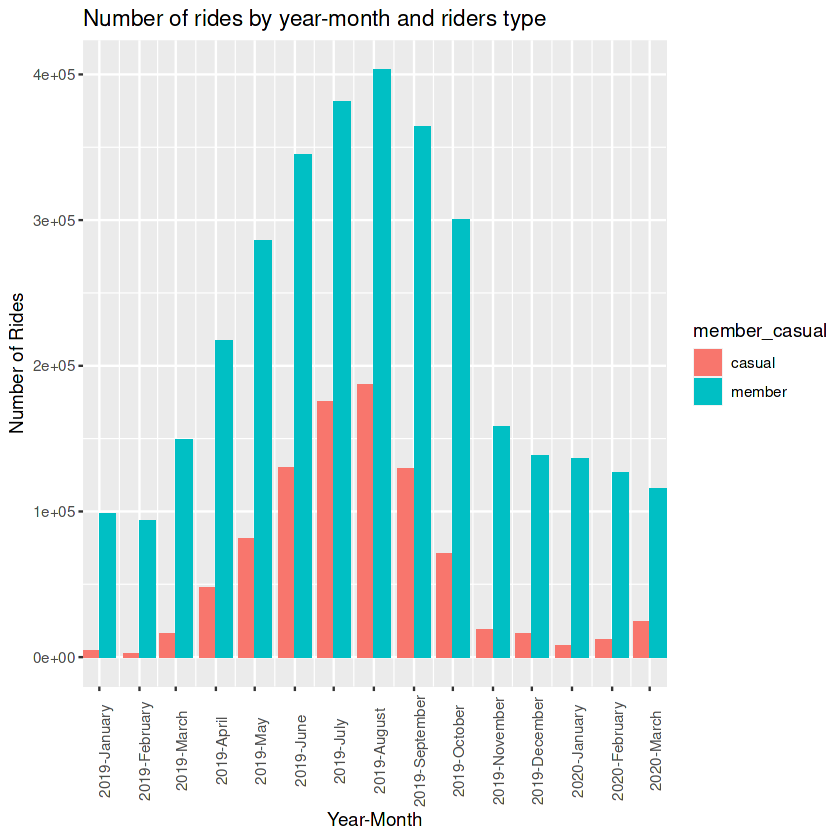

In [35]:
all_trips_v2 %>% 
  mutate(year_month = as.yearmon(all_trips_v2$date)) %>% 
  group_by(member_casual, year_month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, year_month) %>%  
  ggplot(aes(x = as.Date(year_month), y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge", stat = "identity") +
  scale_x_date(date_breaks="1 month", date_labels="%Y-%B", expand=c(0,0)) +
  labs(title = 'Number of rides by year-month and riders type',
       x = 'Year-Month',
       y = 'Number of Rides') +
  theme(axis.text.x = element_text(angle = 90))

Clearly, annual members use more Cyclistic bikes, than casual riders, with August being the month with more demand, followed by July, and September.

Now, let us focus on the average duration of the trips.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Warning message in geom_col(position = "dodge", stat = "identity"):
“Ignoring unknown parameters: `stat`”


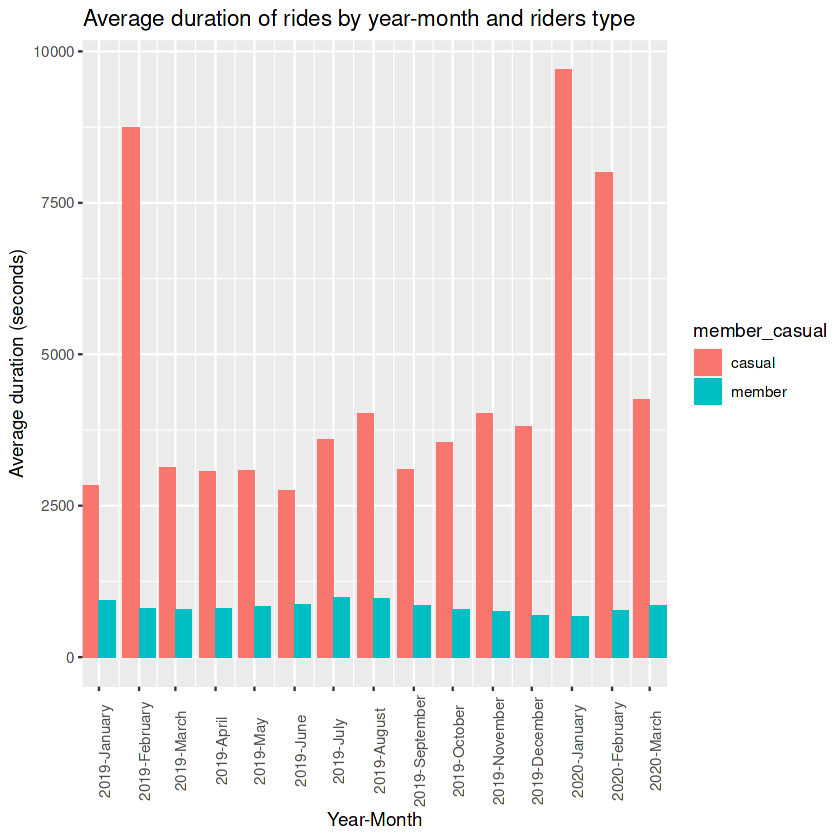

In [36]:
all_trips_v2 %>% 
  mutate(year_month = as.yearmon(all_trips_v2$date)) %>% 
  group_by(member_casual, year_month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, year_month) %>%  
  ggplot(aes(x = as.Date(year_month), y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge", stat = "identity") +
  scale_x_date(date_breaks="1 month", date_labels="%Y-%B", expand=c(0,0)) +
  labs(title = 'Average duration of rides by year-month and riders type',
       x = 'Year-Month',
       y = 'Average duration (seconds)') +
  theme(axis.text.x = element_text(angle = 90))

The new graph now shows that casual riders on average, they take longer trips than annual members, being the beginning of each year the most the most busiest season.

So far, all suggest that casual riders take longer rides compared to annual members during all year, but annual members perform more rides with shorter rides.

Finally, let us see if there is a preference between users depending the day of the week. But first let us order the days of the week starting from Sunday and finishing on Saturday, this will make the visualization easier.

In [37]:
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

Now, let us see the average ride time between annual members vs. casual members.

In [38]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,3559.2956
member,Sunday,927.2716
casual,Monday,3359.6077
member,Monday,845.8799
casual,Tuesday,3562.1547
member,Tuesday,829.8321
casual,Wednesday,3702.9008
member,Wednesday,813.8020
casual,Thursday,3803.1191


So far, the quantities suggest longer rides from casual riders on most days of the week compared to annual members. But, does this means that casual riders use more bikes than annual members? Now, let us add to the previous analysis the number of rides to see if longer rides means more usage of bikes.

In [39]:
all_trips_v2 %>% 
  mutate(weekday = all_trips_v2$day_of_week) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sunday,185059,3559.2956
casual,Monday,105188,3359.6077
casual,Tuesday,93238,3562.1547
casual,Wednesday,94946,3702.9008
casual,Thursday,105599,3803.1191
casual,Friday,125779,3768.9980
casual,Saturday,215536,3339.9183
member,Sunday,292198,927.2716
member,Monday,520703,845.8799


The previous result suggest that it is true that casual riders perform longer rides than the annual members but it seems, based on the number of rides, that annual members use more the bikes than the casual riders, but with shorter trips.

One hypothesis that could explain this behavior is that annual members use the bikes services as their main transportation, i.e., they use this service to go from one point to another in well defined routes, e.g., going to the nearest station from home, to the nearest station from work. If this is done repeatedly makes sense to pay for a subscription.

But casual riders they may not need to go for specific routes, they may be more interested on going to longer trips doing tourism, making several stops during the day, this makes sense when we observe that casual riders make more trips during the weekends.

Now, let us show the previous results but using a column chart so we can easily check if there is a trend in the data.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


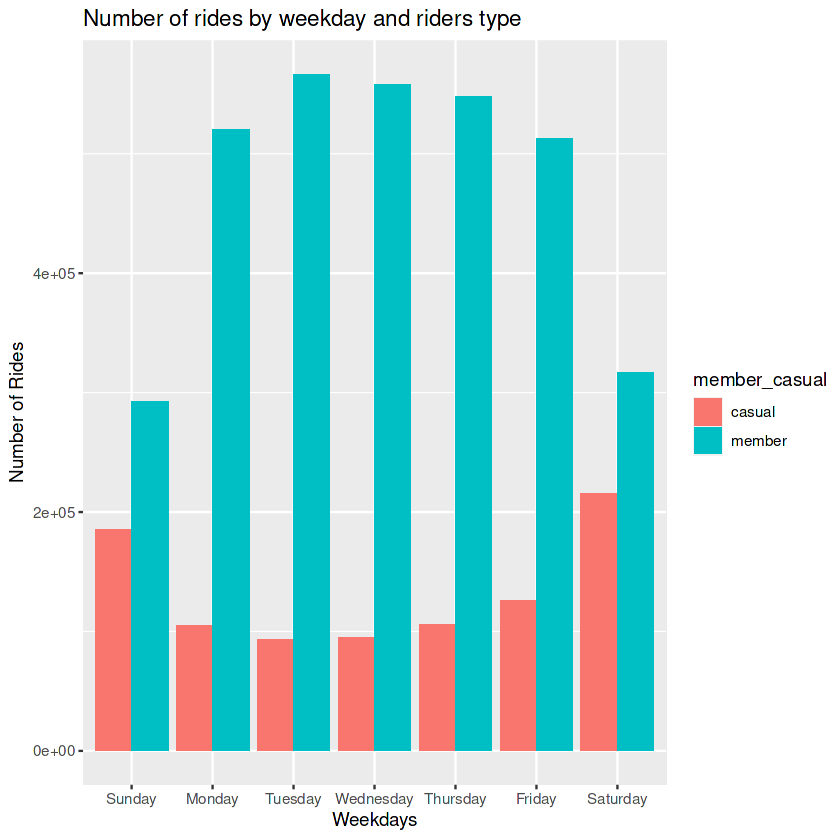

In [40]:
all_trips_v2 %>% 
  mutate(weekday = all_trips_v2$day_of_week) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday) %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = 'Number of rides by weekday and riders type',
       x = 'Weekdays',
       y = 'Number of Rides')

As the chart suggests, annual members clearly use more the bikes. Now, let us focus on the average duration of the trips.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


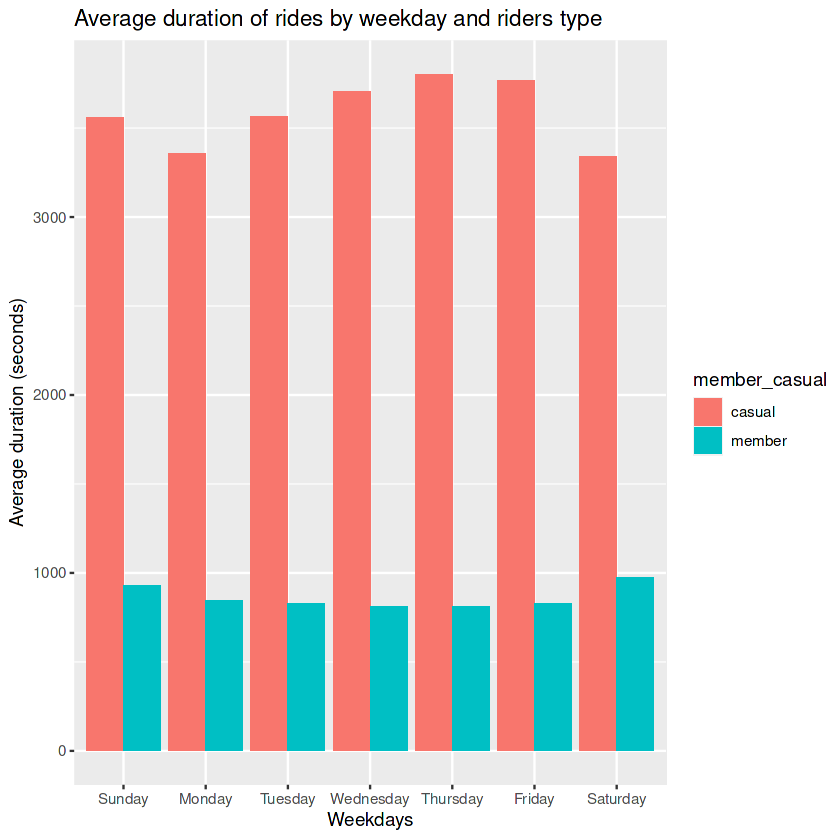

In [41]:
all_trips_v2 %>% 
  mutate(weekday = all_trips_v2$day_of_week) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday) %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = 'Average duration of rides by weekday and riders type',
       x = 'Weekdays',
       y = 'Average duration (seconds)')

Again, the previous chart also suggest longer trips be the casual riders than annual members, but fewer number of rides.

## Exporting final report

Finally, we export the final report that contemplates the number of rides, the average trip duration per member and weekday so we can easily visualize it using any spreadsheet software, Tableau, during a presentation, and/or reproduce the previous charts.

In [44]:
counts_ym <- all_trips_v2 %>%
  mutate(year_month = as.yearmon(all_trips_v2$date)) %>% 
  group_by(member_casual, year_month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, year_month)
write.csv(counts_ym, file = 'year_month_number_rides_and_avg_ride_length_r.csv', row.names = F)

counts_wd <- all_trips_v2 %>%
  mutate(weekday = all_trips_v2$day_of_week) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)
write.csv(counts_wd, file = 'week_day_number_rides_and_avg_ride_length_r.csv', row.names = F)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
